### Recipes 5k

* [Dataset](http://www.ub.edu/cvub/recipes5k/)

* [Original Paper](https://www.researchgate.net/publication/318729535_Food_Ingredients_Recognition_through_Multi-label_Learning)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings/Recipes5k/'
COLUMN = 'embeddings'

In [3]:
text_path = 'text_embeddings.csv'
images_path = 'Embeddings_dinov2_base.csv'

## Get data

### Text

In [4]:
text = pd.read_csv(os.path.join(PATH, text_path))
text

,image,class,split,ingredients,embeddings
0,onion_rings/0_einkorn_onion_rings_hostedLargeU...,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal...","[1.1028140783309937, -1.5013680458068848, -0.3..."
1,onion_rings/1_crispy_onion_rings_hostedLargeUr...,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio...","[0.2510446310043335, -0.8487659692764282, -0.7..."
2,onion_rings/2_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l...","[0.6824526786804199, -1.090896487236023, 0.987..."
3,onion_rings/3_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"oil,pancake mix,spanish onion","[2.3841049671173096, -5.021180629730225, -0.17..."
4,onion_rings/4_onion_rings_hostedLargeUrl.jpg,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,...","[2.3817403316497803, 0.37943604588508606, -3.5..."
...,...,...,...,...,...
4821,chocolate_ice_cream/45_chocolate_ice_cream_hos...,chocolate_ice_cream,train,"dark chocolate,whole milk,unsweetened cocoa po...","[1.4988073110580444, -0.4912002980709076, 1.06..."
4822,chocolate_ice_cream/46_dark_chocolate_ice_crea...,chocolate_ice_cream,train,"half & half,whole milk,heavy cream,sugar,sea s...","[0.7600823640823364, 0.5964796543121338, 0.303..."
4823,chocolate_ice_cream/47_the_darkest_chocolate_i...,chocolate_ice_cream,train,"unsweetened cocoa powder,brewed coffee,granula...","[1.6432948112487793, -1.712591290473938, 1.486..."
4824,chocolate_ice_cream/48_homemade_chocolate_ice_...,chocolate_ice_cream,train,"unsweetened cocoa powder,sugar,firmly packed b...","[2.056760549545288, -1.5574166774749756, -0.36..."


### Images

In [5]:
images = pd.read_csv(os.path.join(PATH, images_path))
images.head()

,ImageName,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,onion_rings/0_einkorn_onion_rings_hostedLargeU...,5.255562,-1.102281,3.221878,-0.848734,1.142476,1.436065,0.303136,-2.795287,-1.534621,...,0.145026,-0.173223,-1.631687,-1.373413,-1.700477,2.993020,-0.123423,0.482150,0.335781,0.164388
1,onion_rings/1_crispy_onion_rings_hostedLargeUr...,-0.180872,0.357785,2.953790,-0.514284,3.046458,3.261230,-0.069414,-2.036384,-0.755874,...,1.585758,1.397843,-2.597118,-1.620306,1.528063,-1.035716,1.339101,-1.978144,-0.381255,-0.014164
2,onion_rings/2_onion_rings_hostedLargeUrl.jpg,5.125897,-0.426740,3.452004,-2.458713,1.216147,0.867196,0.016434,-1.605688,-1.242954,...,0.984198,1.104070,-2.185897,0.033494,-1.515771,2.490174,-1.488795,1.110195,0.044147,0.145058
3,onion_rings/3_onion_rings_hostedLargeUrl.jpg,4.048971,-0.883851,3.259991,-1.269905,2.037031,0.474060,2.139239,-1.652627,-1.356481,...,0.464018,0.658732,-1.866643,-0.403469,-0.583548,2.141593,0.015457,0.862089,-1.321241,0.749305
4,onion_rings/4_onion_rings_hostedLargeUrl.jpg,2.488026,2.054659,3.591714,-2.157786,0.088067,2.232692,0.783981,-2.377056,1.325430,...,0.527386,0.913060,-2.255255,0.041726,-0.814133,1.396166,0.624918,0.262062,-0.816889,-1.154006


### Merge and preprocess the datasets

In [6]:
df = preprocess_data(text, images, "image", "ImageName")
df.to_csv(os.path.join(PATH, 'embeddings.csv'), index=False)
df.head()

,class,split,ingredients,text_1,text_2,text_3,text_4,text_5,text_6,text_7,...,image_758,image_759,image_760,image_761,image_762,image_763,image_764,image_765,image_766,image_767
0,onion_rings,val,"yellow onion,flour,baking powder,seasoning sal...",1.102814,-1.501368,-0.301835,-1.239182,-0.910469,-0.634073,0.839440,...,0.145026,-0.173223,-1.631687,-1.373413,-1.700477,2.993020,-0.123423,0.482150,0.335781,0.164388
1,onion_rings,train,"white onion,panko,cornmeal,ground paprika,onio...",0.251045,-0.848766,-0.742973,-1.274160,-2.171595,0.156482,-0.167365,...,1.585758,1.397843,-2.597118,-1.620306,1.528063,-1.035716,1.339101,-1.978144,-0.381255,-0.014164
2,onion_rings,train,"yellow onion,all-purpose flour,baking powder,l...",0.682453,-1.090896,0.987037,-0.275286,-2.029299,-0.240013,1.039339,...,0.984198,1.104070,-2.185897,0.033494,-1.515771,2.490174,-1.488795,1.110195,0.044147,0.145058
3,onion_rings,train,"oil,pancake mix,spanish onion",2.384105,-5.021181,-0.179801,-0.909381,0.369275,-1.475059,0.131486,...,0.464018,0.658732,-1.866643,-0.403469,-0.583548,2.141593,0.015457,0.862089,-1.321241,0.749305
4,onion_rings,train,"peanut oil,sweet onion,flour,eggs,celery salt,...",2.381740,0.379436,-3.507455,0.028276,0.625003,1.816234,-1.526726,...,0.527386,0.913060,-2.255255,0.041726,-0.814133,1.396166,0.624918,0.262062,-0.816889,-1.154006


## Data Perparation

In [7]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'class'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (3409, 4867)
Test Shape: (783, 4867)


### Models

In [8]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 2.43 MB
The number of parameters of the model are: 636005


STAGE:2024-02-10 19:22:54 17264:17264 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.6347, macro-f1: 0.5902
Epoch 1/15 - Training Time: 0.37 seconds | Inference Time: 0.15 seconds
Epoch 2/15 - Test Accuracy: 0.7676, macro-f1: 0.7348
Epoch 2/15 - Training Time: 0.49 seconds | Inference Time: 0.14 seconds
Epoch 3/15 - Test Accuracy: 0.8199, macro-f1: 0.7975
Epoch 3/15 - Training Time: 0.54 seconds | Inference Time: 0.15 seconds
Epoch 4/15 - Test Accuracy: 0.8289, macro-f1: 0.8177
Epoch 4/15 - Training Time: 0.53 seconds | Inference Time: 0.15 seconds
Epoch 5/15 - Test Accuracy: 0.8416, macro-f1: 0.8281
Epoch 5/15 - Training Time: 0.51 seconds | Inference Time: 0.16 seconds
Epoch 6/15 - Test Accuracy: 0.8544, macro-f1: 0.8453
Epoch 6/15 - Training Time: 0.56 seconds | Inference Time: 0.16 seconds
Epoch 7/15 - Test Accuracy: 0.8544, macro-f1: 0.8466
Epoch 7/15 - Training Time: 0.58 seconds | Inference Time: 0.15 seconds
Epoch 8/15 - Test Accuracy: 0.8493, macro-f1: 0.8368
Epoch 8/15 - Training Time: 0.58 seconds | Inference Time: 0.16 seconds


STAGE:2024-02-10 19:23:05 17264:17264 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 19:23:05 17264:17264 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         7.00%     628.289ms        65.44%        5.871s       7.248ms    -960.35 Mb    -995.74 Mb           810  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        27.90%        2.503s        28.26%        2.535s       2.450ms       1.16 Gb       1.16 Gb          1035  
                              Optimizer.step#AdamW.step         4.02%     360.507ms        22.60%        2.028s       2.504ms       4.85 Mb      -3.81

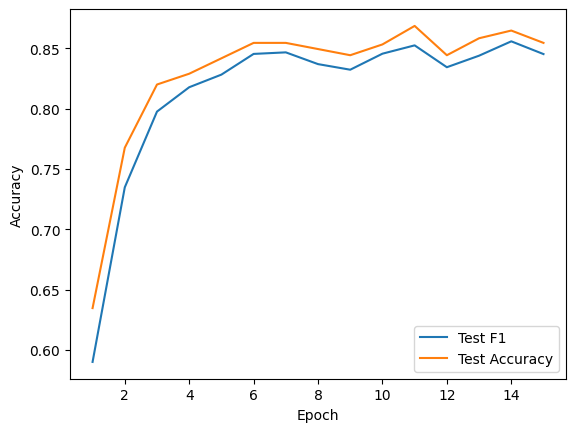

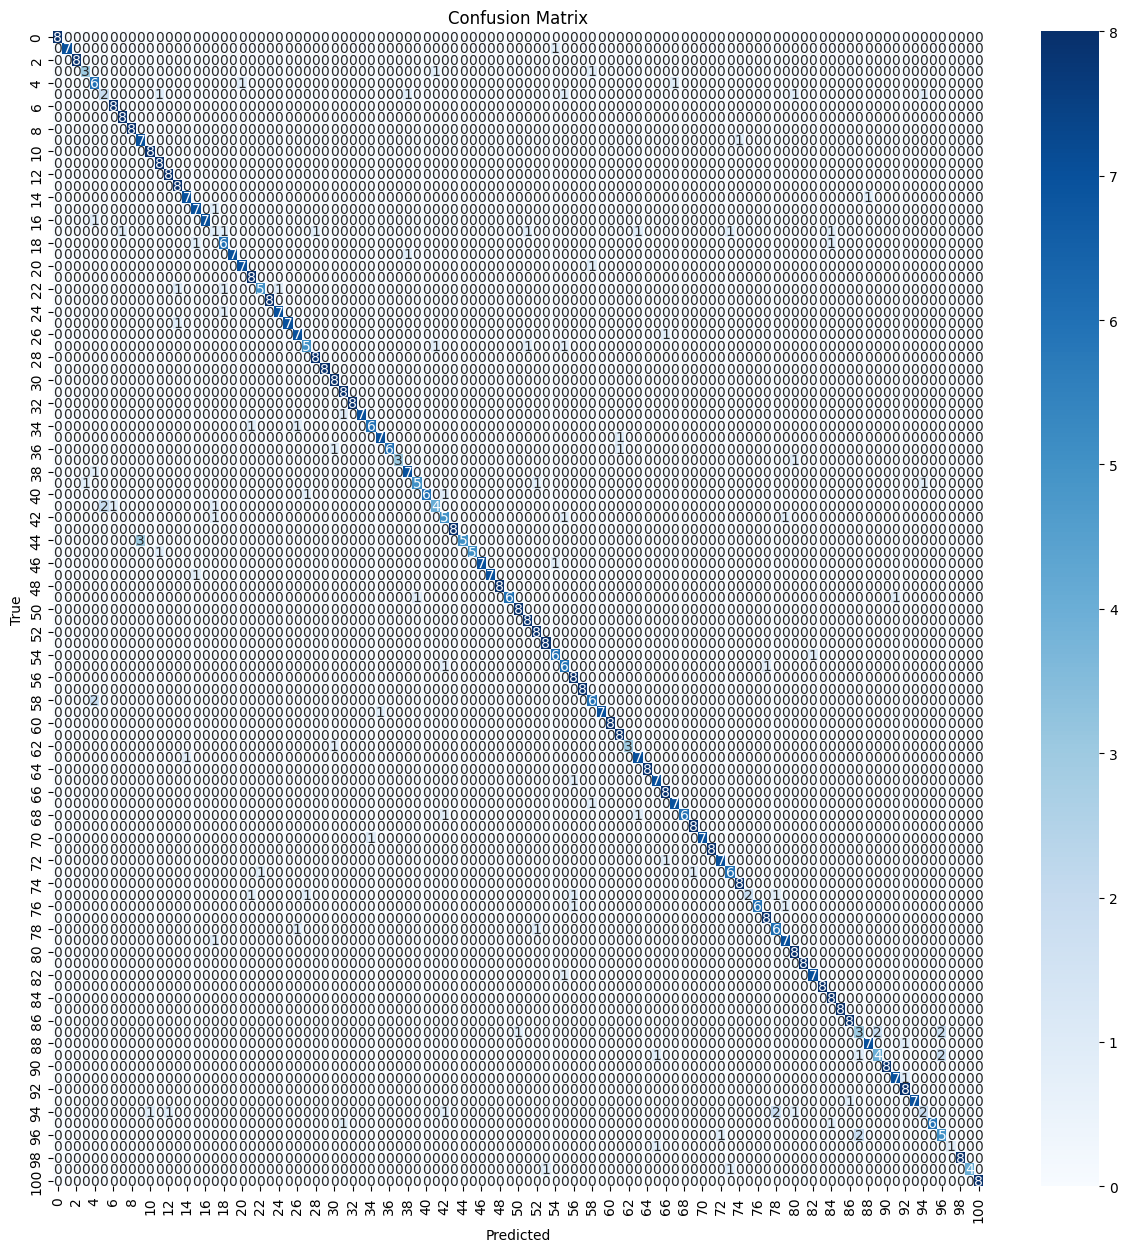

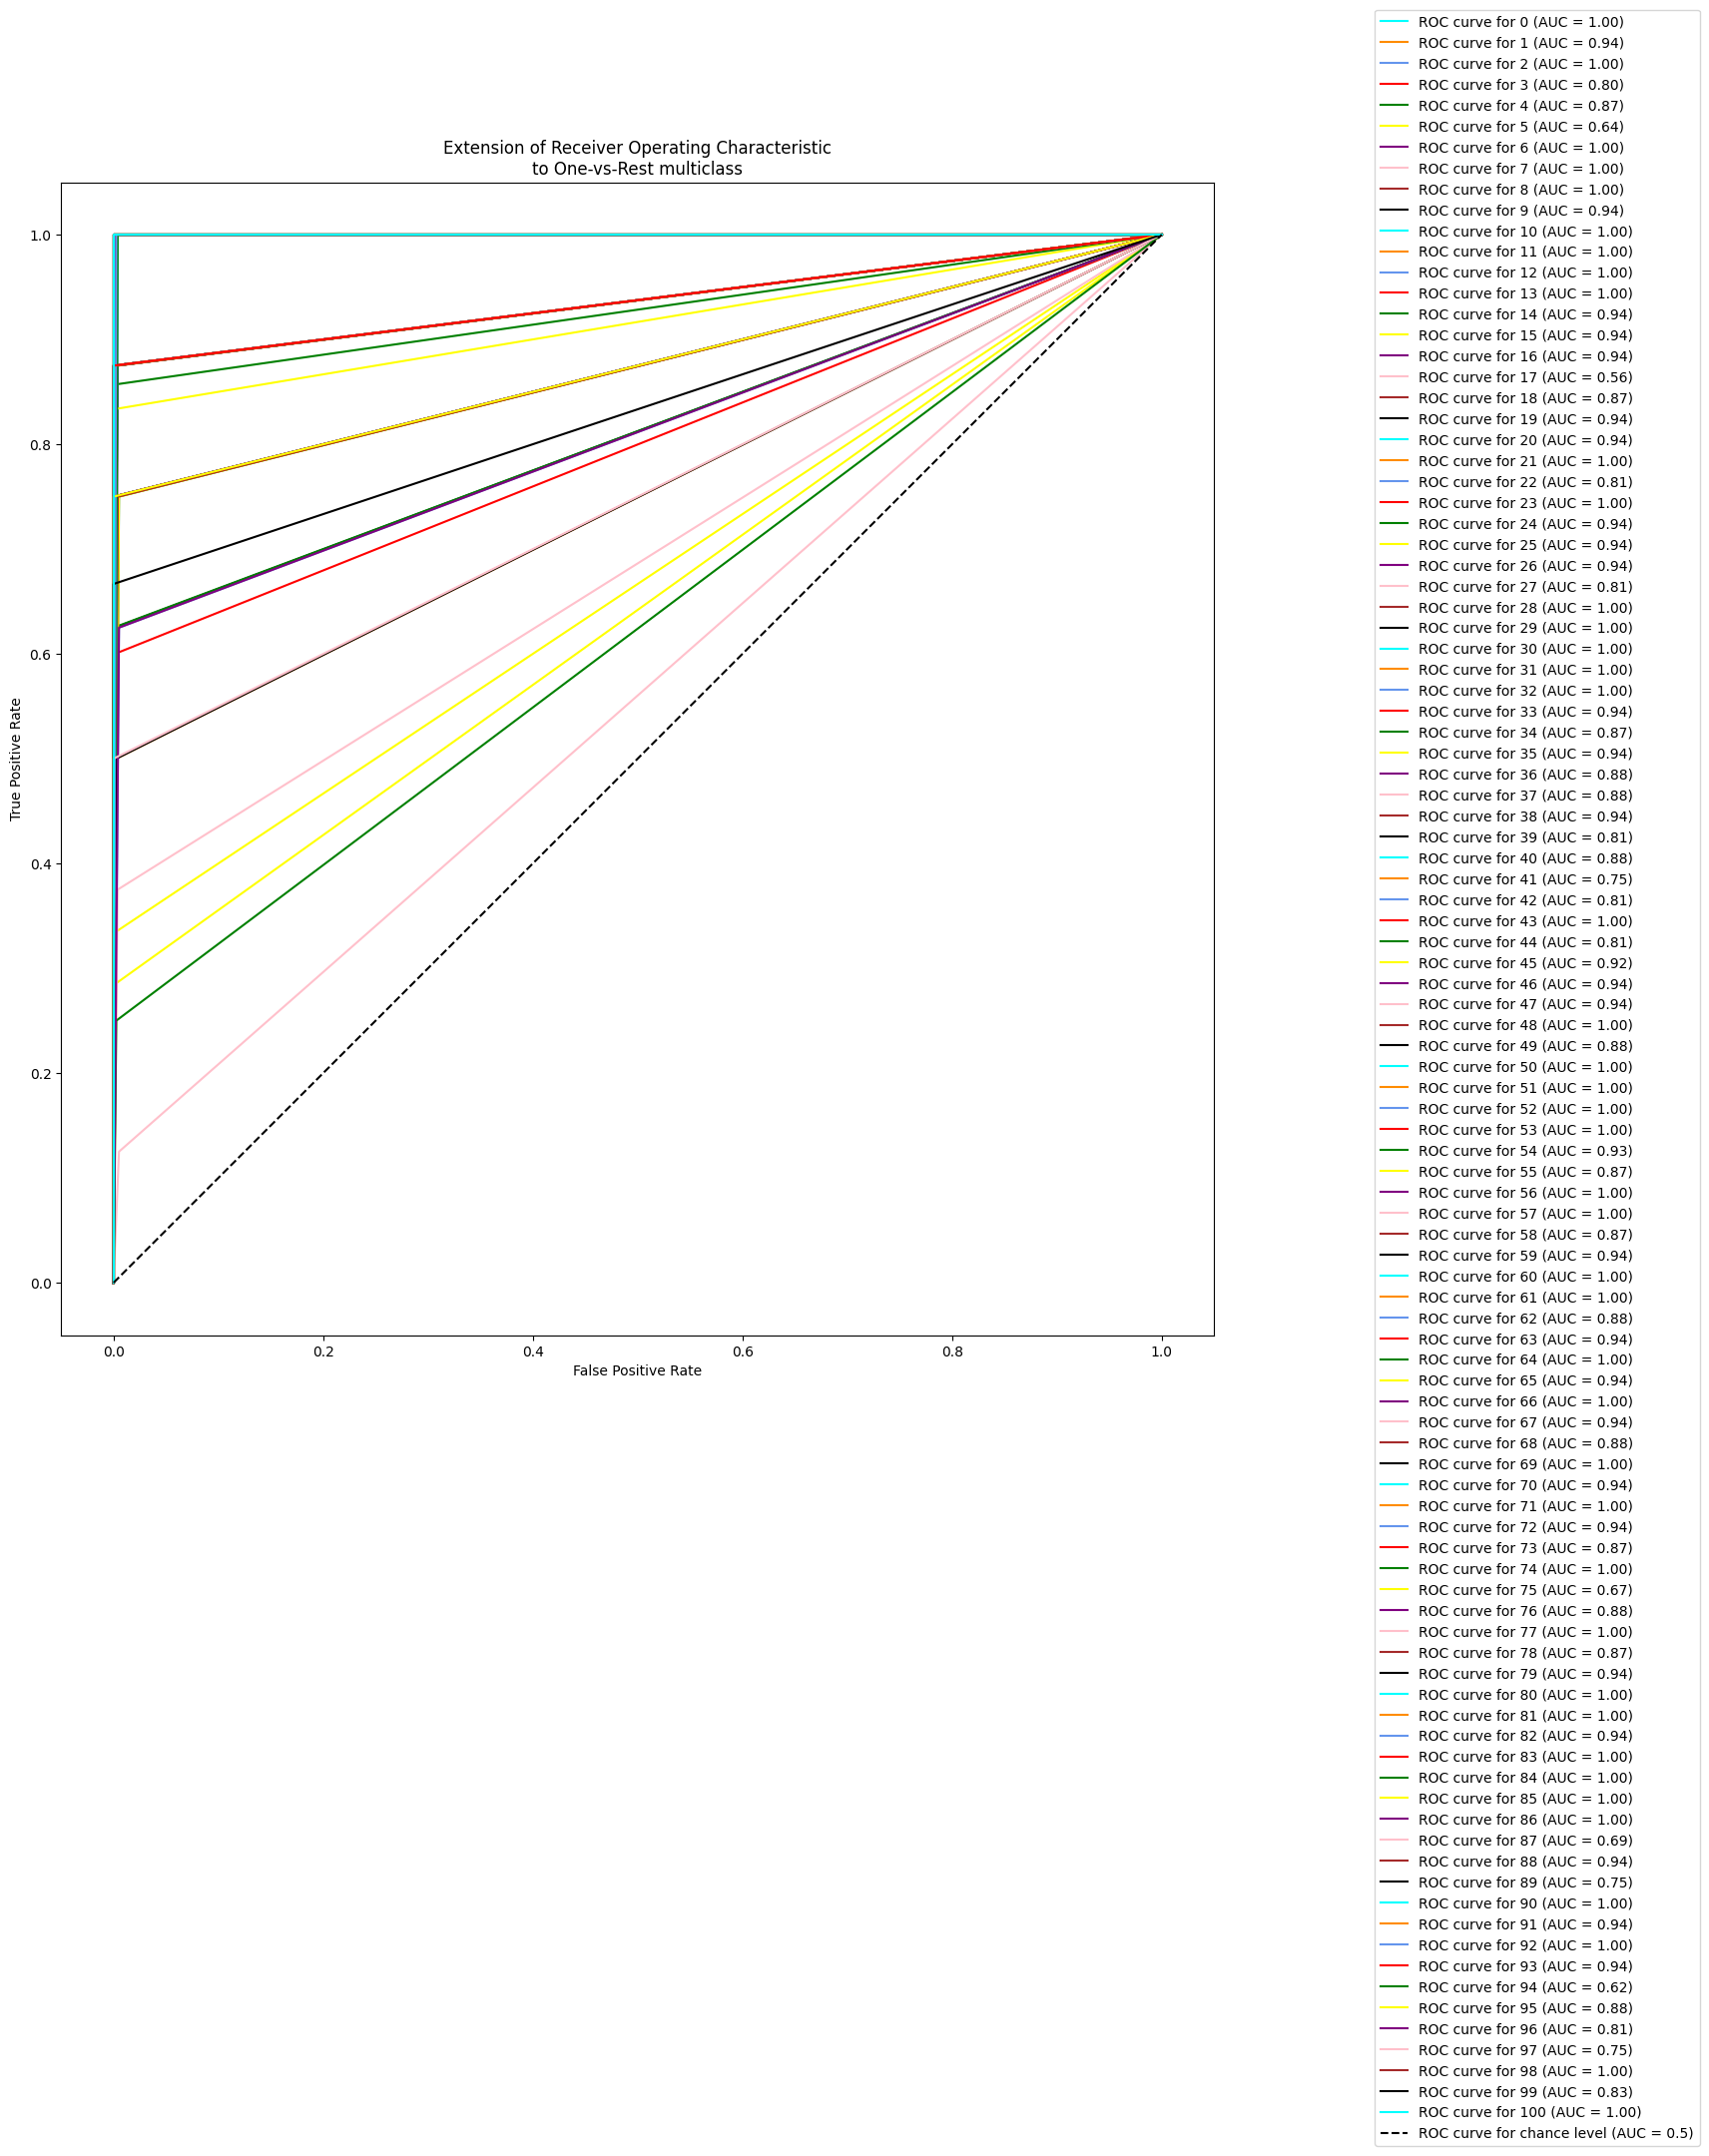

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         8
           3       0.75      0.60      0.67         5
           4       0.60      0.75      0.67         8
           5       0.50      0.29      0.36         7
           6       0.89      1.00      0.94         8
           7       0.89      1.00      0.94         8
           8       1.00      1.00      1.00         8
           9       0.70      0.88      0.78         8
          10       0.89      1.00      0.94         8
          11       0.80      1.00      0.89         8
          12       0.89      1.00      0.94         8
          13       0.80      1.00      0.89         8
          14       0.88      0.88      0.88         8
          15       0.78      0.88      0.82         8
          16       1.00      0.88      0.93         8
          17       0.20    

In [9]:
# Train early fusion model
print("Training Early Fusion Model:")

train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True, p=0.2)

Training Late Fusion Model:
Model Memory Usage: 1.24 MB
The number of parameters of the model are: 324709


STAGE:2024-02-10 19:23:59 17264:17264 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/15 - Test Accuracy: 0.6935, macro-f1: 0.6538
Epoch 1/15 - Training Time: 0.54 seconds | Inference Time: 0.16 seconds
Epoch 2/15 - Test Accuracy: 0.7918, macro-f1: 0.7693
Epoch 2/15 - Training Time: 0.58 seconds | Inference Time: 0.18 seconds
Epoch 3/15 - Test Accuracy: 0.8199, macro-f1: 0.8015
Epoch 3/15 - Training Time: 0.52 seconds | Inference Time: 0.18 seconds
Epoch 4/15 - Test Accuracy: 0.8340, macro-f1: 0.8183
Epoch 4/15 - Training Time: 0.50 seconds | Inference Time: 0.17 seconds
Epoch 5/15 - Test Accuracy: 0.8544, macro-f1: 0.8380
Epoch 5/15 - Training Time: 0.58 seconds | Inference Time: 0.16 seconds
Epoch 6/15 - Test Accuracy: 0.8455, macro-f1: 0.8344
Epoch 6/15 - Training Time: 0.52 seconds | Inference Time: 0.17 seconds
Epoch 7/15 - Test Accuracy: 0.8659, macro-f1: 0.8523
Epoch 7/15 - Training Time: 0.53 seconds | Inference Time: 0.17 seconds
Epoch 8/15 - Test Accuracy: 0.8506, macro-f1: 0.8387
Epoch 8/15 - Training Time: 0.60 seconds | Inference Time: 0.17 seconds


STAGE:2024-02-10 19:24:10 17264:17264 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-10 19:24:10 17264:17264 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         9.42%     798.045ms        64.07%        5.430s       5.403ms      -1.15 Gb      -1.19 Gb          1005  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        35.51%        3.010s        35.85%        3.039s       2.936ms       1.16 Gb       1.16 Gb          1035  
                              Optimizer.step#AdamW.step         5.56%     471.358ms        29.53%        2.503s       3.090ms       2.48 Mb      -1.94

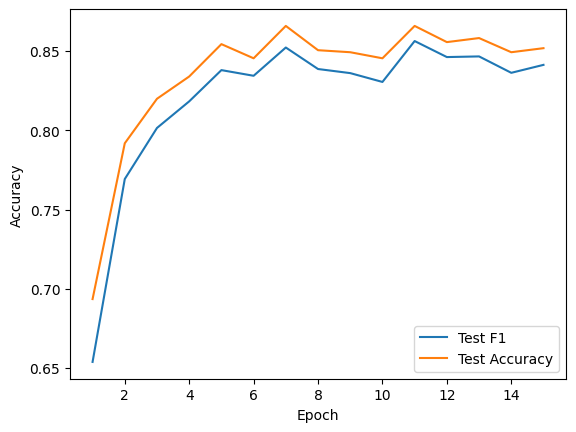

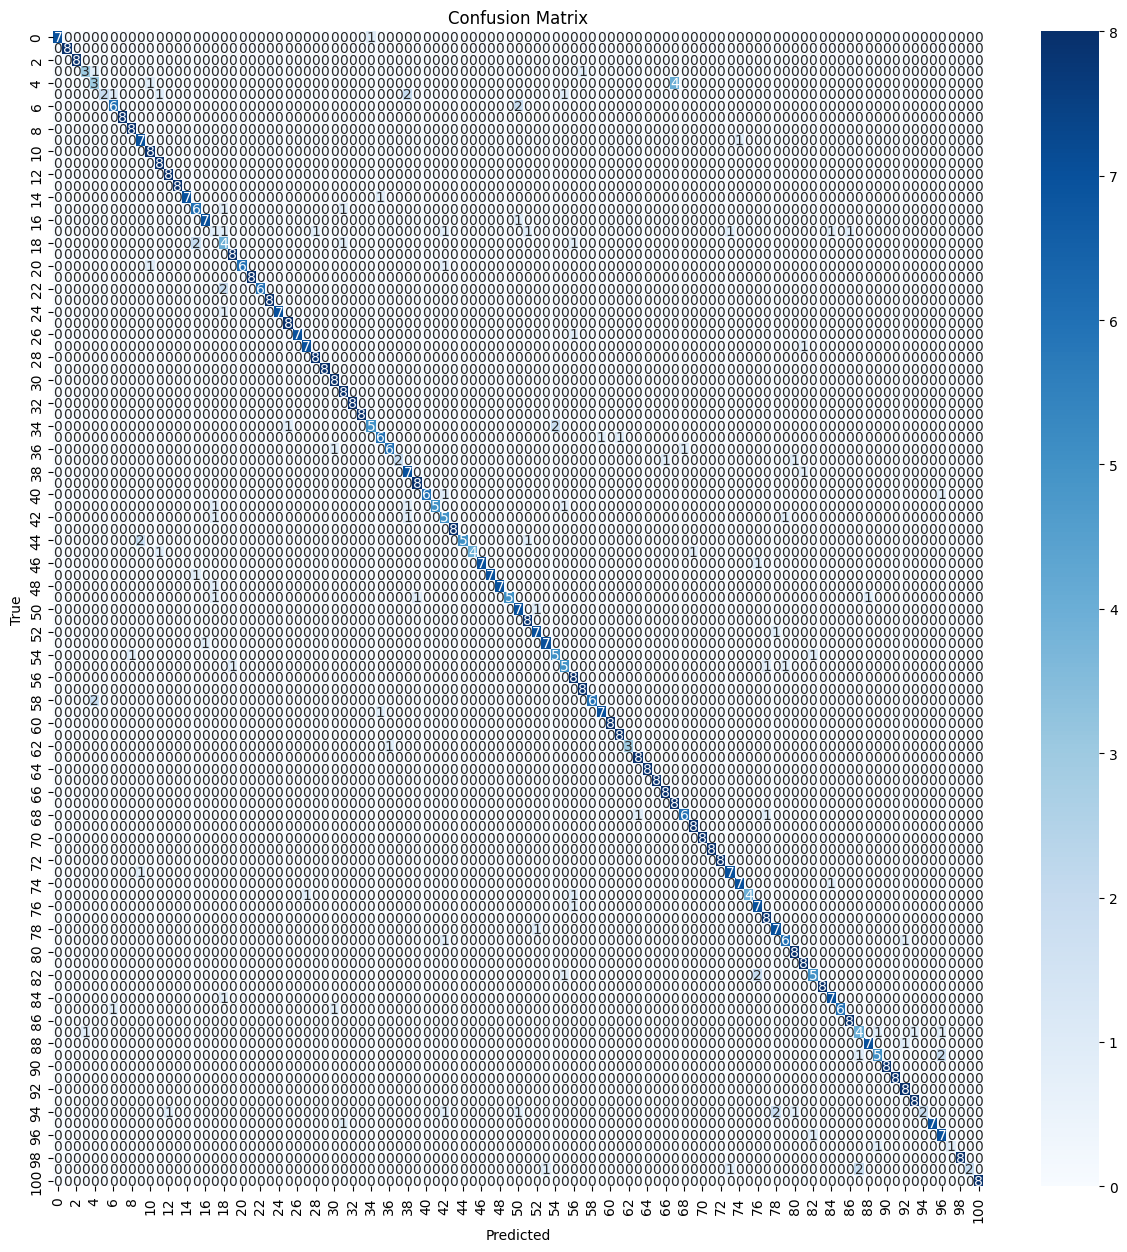

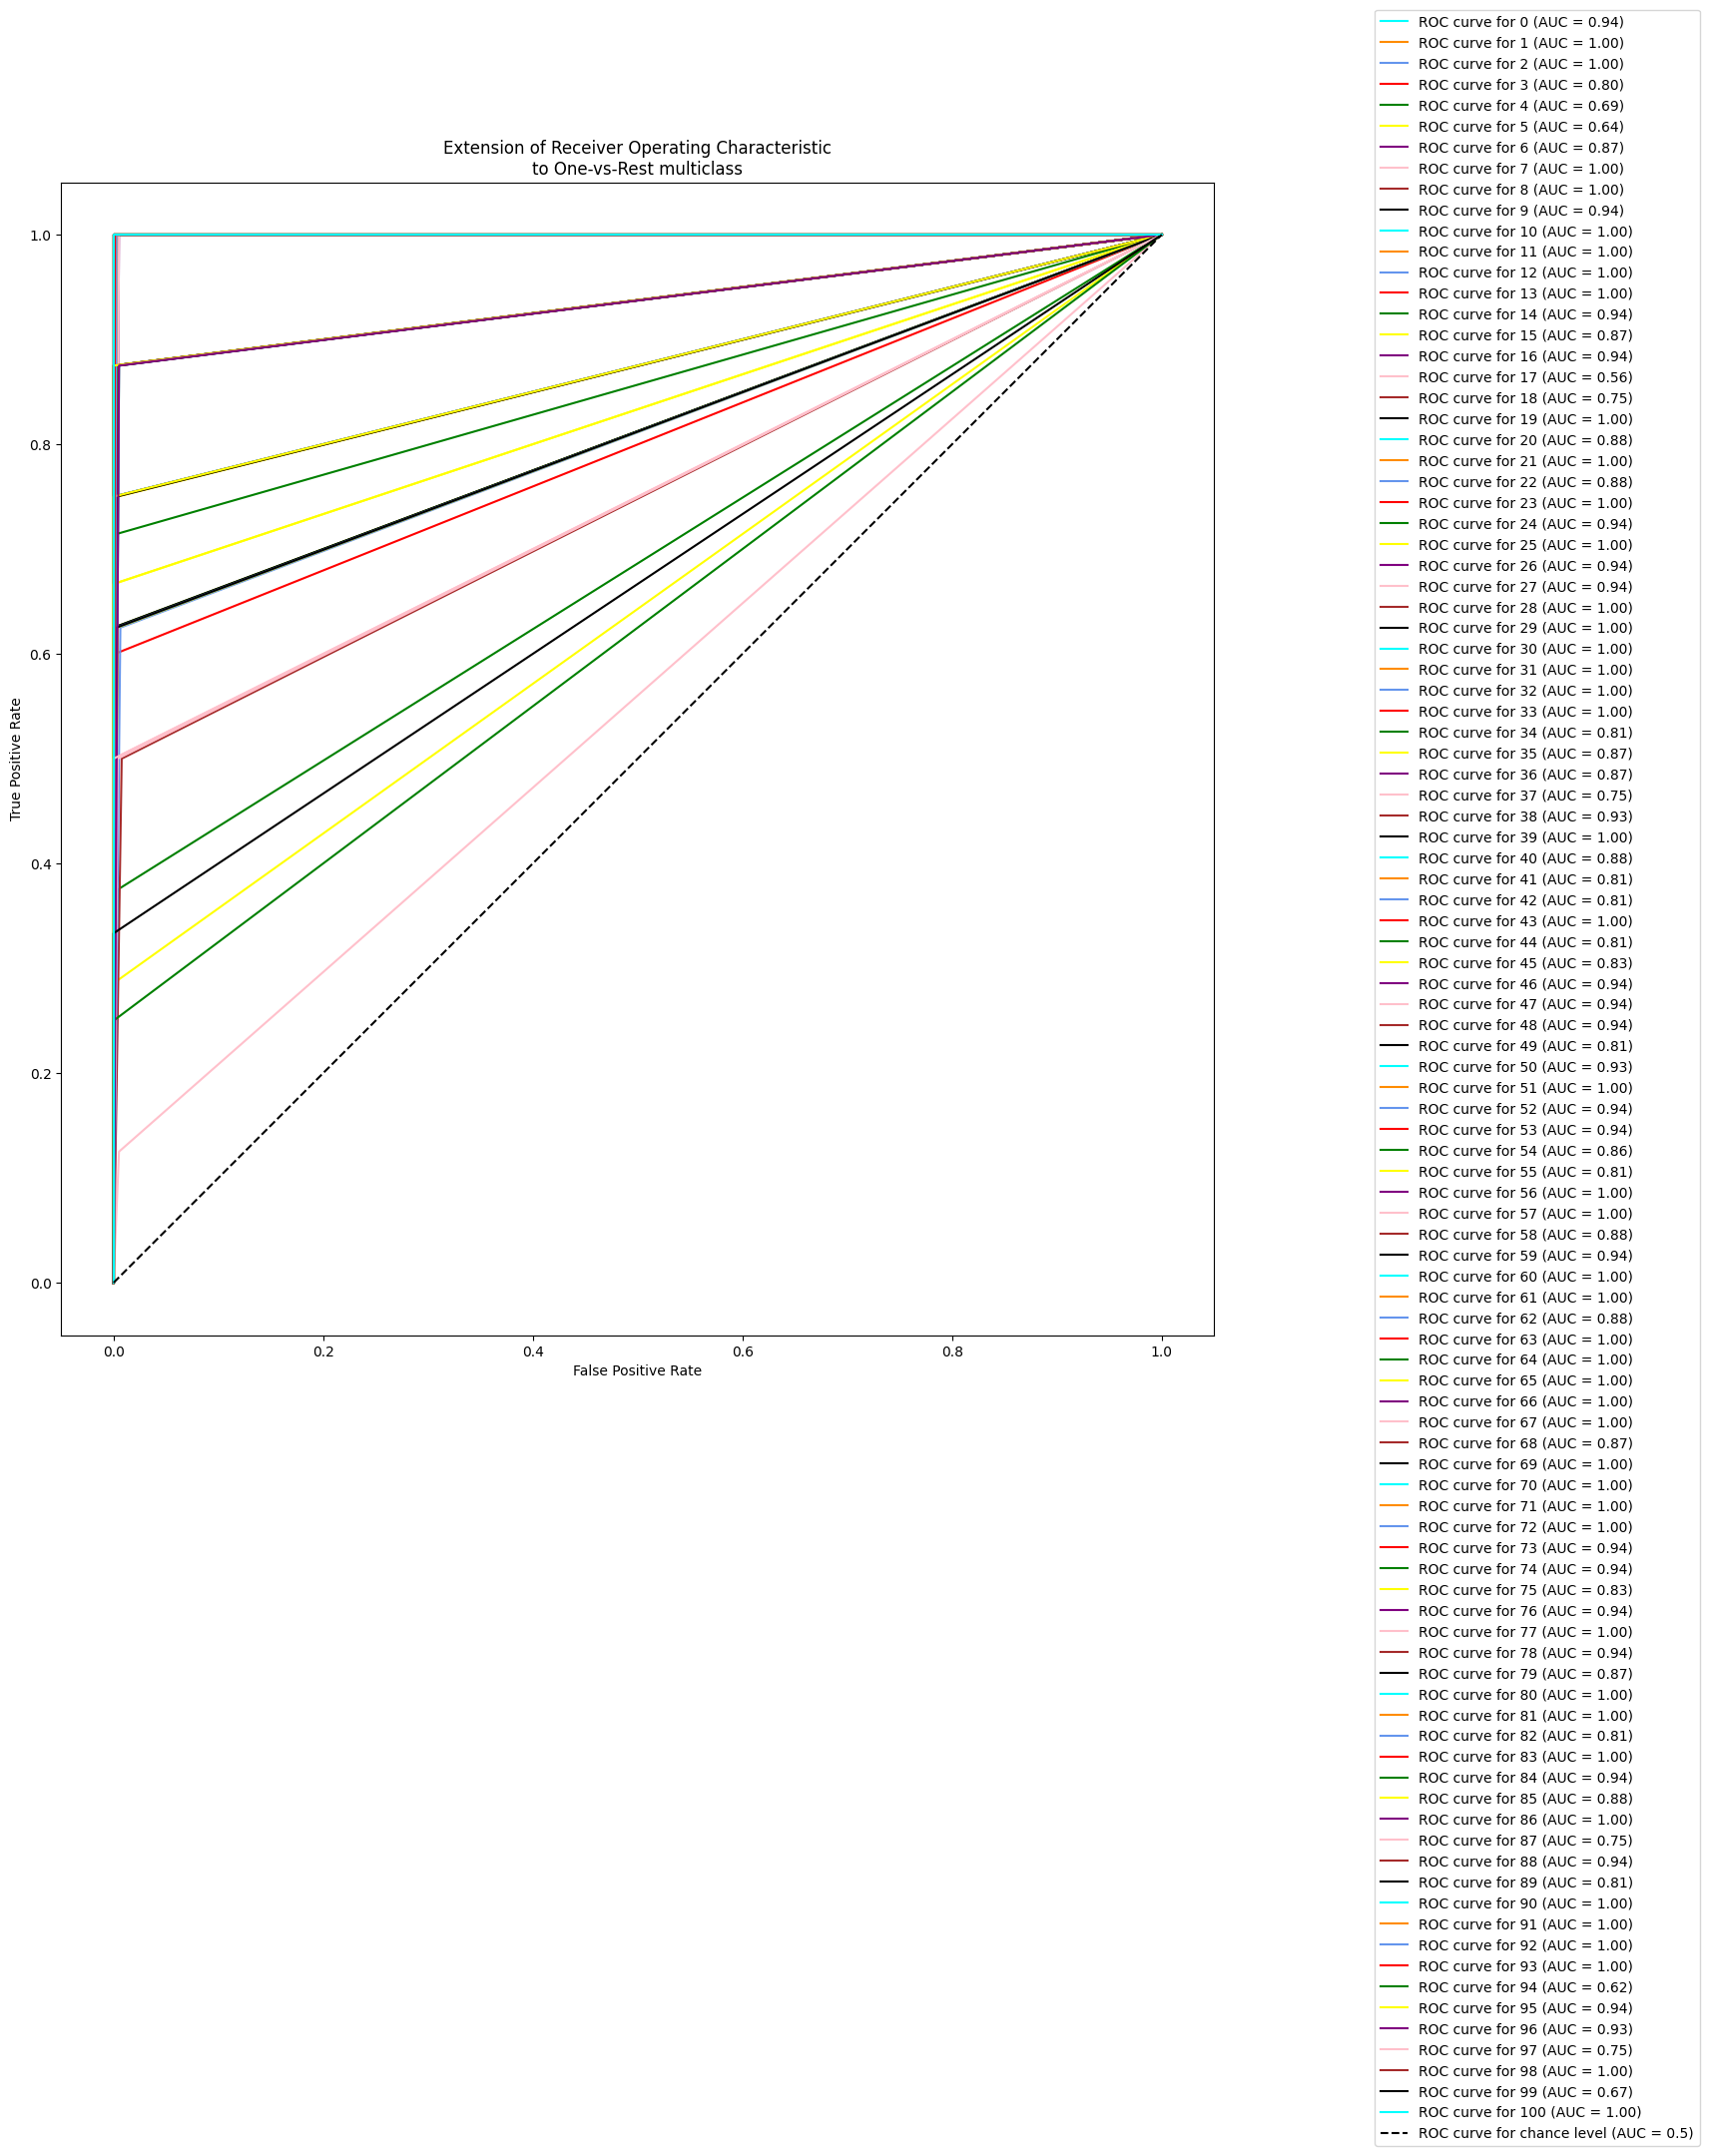

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       0.75      0.60      0.67         5
           4       0.50      0.38      0.43         8
           5       1.00      0.29      0.44         7
           6       0.75      0.75      0.75         8
           7       1.00      1.00      1.00         8
           8       0.89      1.00      0.94         8
           9       0.70      0.88      0.78         8
          10       0.80      1.00      0.89         8
          11       0.80      1.00      0.89         8
          12       0.89      1.00      0.94         8
          13       1.00      1.00      1.00         8
          14       1.00      0.88      0.93         8
          15       0.67      0.75      0.71         8
          16       0.88      0.88      0.88         8
          17       0.20    

In [10]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=15, multilabel=multilabel, report=True, p=0.2)